<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Techniques/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

###Analysing the parameters of the make_circles function
- `factor = 0.9`

  This parameter controls the relative size of the inner circle compared to the outer circle. A value of 0.9 means the radius of the inner circle is 90% of the radius of the outer circle. Larger factor values result in the two circles being closer to each other, making the classification task more challenging.

- `noise = 0.2`

  The noise parameter adds random Gaussian noise to the data points, introducing variability. A noise value of 0.2 means the points in each circle are perturbed by some random variation, making the task less deterministic.

- `random_state = 0`

  The random_state parameter controls the random seed for reproducibility.Setting `random_state=0` ensures that the same random data is generated each time the code is run, making the results consistent and allowing others to replicate the work.











## Problem 1
Plot the dataset using matplotlib.

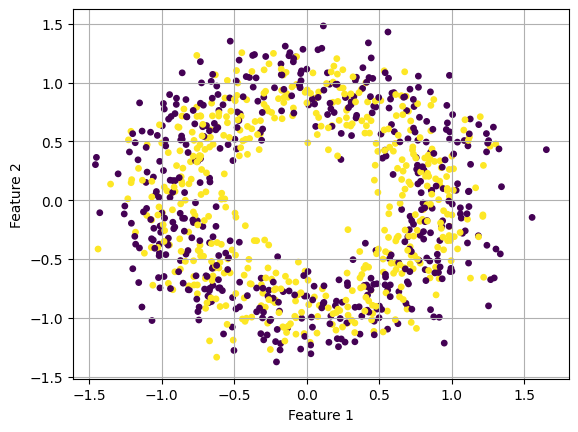

In [63]:
# Enter your solution here
feature1 = X[:, 0]
feature2 = X[:, 1]

plt.scatter(feature1, feature2, c=y, s=15)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Problem 2
How many samples are there in the dataset?


In [13]:
# Enter your solution here
y.shape[0]

1000

## Problem 3
How many features are there in the dataset?

In [14]:
# Enter your solution here
'''X is an nxd matrix, where
    1. n = no of row = no of samples
    2. d = no of cols = no of features'''
X.shape[1]

2

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

---

Polynomial Kernel $K$ with degree $d$
$$
K({x}_i, {x}_j) = ({x}_i ⋅ {x}_j + 1)^d
$$

In [65]:
# Enter your solution here
def polyKernel(m):
  d = 2
  K = (np.dot(m, m.T) + 1) ** d
  return K

K = polyKernel(X)
n = K.shape[0]
print( np.sqrt(np.sum(K**2)) / n)

2.096195646589988


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

---

Gaussian Kernel $K$
$$
K(x_i, x_j) = \exp\left(-\frac{||x_i - x_j||^2}{2 \sigma^2}\right)
$$

where $||x_i - x_j||^2$ is the squared Euclidean distance between $x_i$ and $x_j$ and $\sigma$ is the kernel parameter.

In [66]:
# Enter your solution here
from scipy.spatial.distance import cdist

def gaussianKernel(m):
  pairwise_sq_dists = cdist(m, m, 'sqeuclidean')
  K = np.exp( - pairwise_sq_dists/8)      # 2σ^2 = 2 * (2)^2 = 8
  return K

K = gaussianKernel(X)
n = K.shape[0]
print( np.sqrt(np.sum(K**2)) / n )

0.8079400085320029


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 4. Call this centered matrix $K_C$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} K_{C,ij}^2}
$$

---

The centered kernel matric $K_C$ is computed using the following formula
$$
K_C = K - I_nK - KI_n + I_nKI_n
$$

where $I_n$ is an $n×n$ matrix where all entries are $\frac{1}{n}$

In [72]:
# Enter your solution here
def centreKernel(K):
  n = K.shape[0]
  I = np.ones((n,n)) / n
  K_C = K - np.dot(I, K) - np.dot(K, I) + np.dot(np.dot(I,K) , I)
  return K_C

K = polyKernel(X)
K_C = centreKernel(K)
print( np.sqrt(np.sum(K_C**2)) / n)

1.4517985176976844


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

---
Here, first we will perform eigen decomposition on centered kernel matrix $K_C$
$$
K_C = VΛV^T
$$
Where
- $V$ contains eigenvectors
- $Λ$ is diagonal matrix of eigenvalues.

Then projections on $1^{st}$ and $2^{nd}$ PC will be given by
$$
\alpha_i = \sqrt{\lambda_1} \cdot v_{i1}, \quad \beta_i = \sqrt{\lambda_1} \cdot v_{i2}
$$
Where
- $\lambda_1$ and $\lambda_2$ are the first two eigenvalues.
- $v_{i1}$ and $v_{i2}$ are the first and second eigenvectors.

In [76]:
# Enter your solution here
K = polyKernel(X)
K_C = centreKernel(K)

# Eigen decomposition
eigval, eigvec = np.linalg.eigh(K_C)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigval)[::-1]
eigval = eigval[sorted_indices]
eigvec = eigvec[:, sorted_indices]

alpha = np.sqrt(eigval[0]) * eigvec[:, 0]  # Projections on the 1st PC
beta = np.sqrt(eigval[1]) * eigvec[:, 1]  # Projections on the 2nd PC

print(alpha.sum() + beta.sum())

-1.7763568394002505e-15
